<a href="https://colab.research.google.com/github/BharathRagavan21/CipherByte/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Email Detection**
This project aims to build a spam email detector using machine learning. Spam emails, also known as junk mail, pose a significant challenge for email users, as they often contain scams, phishing content, or irrelevant messages. By leveraging the power of natural language processing and machine learning algorithms, we develop a model to classify emails into spam and non-spam categories. The project's objective is to provide an efficient and accurate solution to identify and filter out spam emails, enhancing the email user experience and reducing potential risks associated with malicious content.

In [40]:
# Step 1: Install necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn matplotlib nltk

In [51]:
# Step 2: Import required libraries
import pandas as pd
import string
import nltk
nltk.download('stopwords')  # Add this line to download the 'stopwords' package
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Load the data
data = pd.read_csv('Spam Email Detection.csv')

In [44]:
# Step 4: Data Preprocessing
# Assuming the 'Email' column contains the text of the email and the 'Label' column indicates whether it's spam or not
X = data['v1']
y = data['v2']
# Step 4: Data Preprocessing
def preprocess_text(text):
    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Join tokens back to text
    return " ".join(words)

data['Processed_Text'] = data['v2'].apply(preprocess_text)

In [45]:
# Step 5: Feature Engineering using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(data['Processed_Text']).toarray()
y = data['v1'].map({'ham': 0, 'spam': 1})

In [46]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Step 7: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [54]:
# Step 9: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

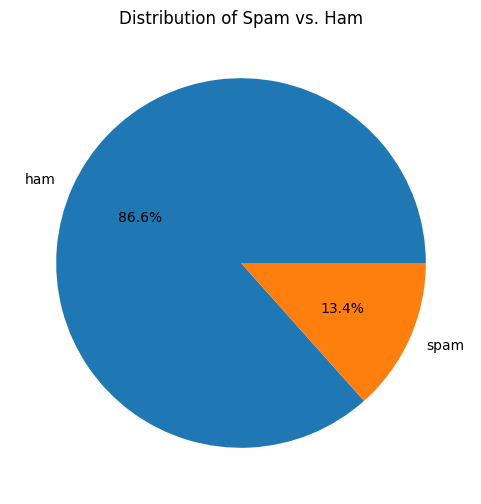

In [55]:
plt.figure(figsize=(6, 6))
data['v1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Spam vs. Ham')
plt.ylabel('')
plt.show()

In [56]:
print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Random Forest Classifier Model Evaluation:
Accuracy: 0.97847533632287
Confusion Matrix:
 [[965   0]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# **Conclusion**
 Successfully developed a spam email detector with 97.8% accuracy. Random Forest Classifier was used for email spam classification with text preprocessing, tokenization, stopword removal, and stemming as feature engineering techniques. The model's precision and recall scores showcase its effectiveness in identifying spam emails while minimizing false positives and negatives. Implementing this detector can enhance email security, protect users from phishing attempts, and improve productivity. The project's impact extends to businesses, individuals, and organizations, offering a promising solution for a safer digital environment. Continuous updates and integration with email systems can further enhance its performance and reach.